In [19]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [20]:
df = pd.read_parquet('data/hurdat2.parquet')

In [21]:
df = df.loc[(df.Year >= 1972)]

In [45]:
# Group by 'UniqueID' to reduce to unique hurricanes, taking max wind speed and month of occurrence
df_unique_hurricanes = df.groupby('UniqueID').agg({
    'MaxWind': 'max',    # Take the maximum wind speed for each hurricane
    'Month': 'first'          # Take the first month of occurrence
}).reset_index()

In [47]:
# Group the unique hurricanes by month and calculate counts and average intensity
monthly_counts = df_unique_hurricanes.groupby('Month').size().reset_index(name='Count')
monthly_avg_intensity = df_unique_hurricanes.groupby('Month')['MaxWind'].mean().reset_index(name='AvgIntensity')

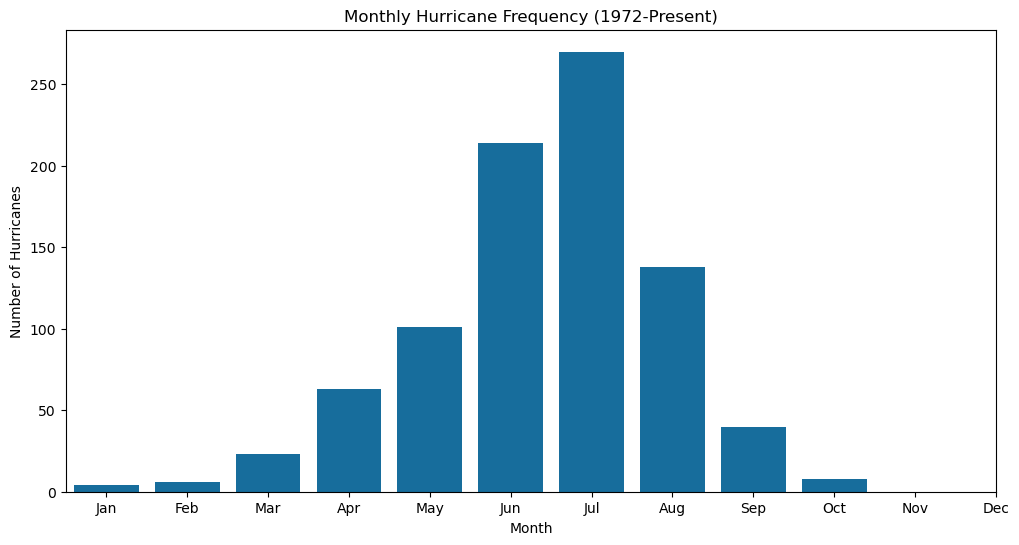

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Count', data=monthly_counts, color=sns.color_palette('colorblind')[0])
plt.xlabel('Month')
plt.ylabel('Number of Hurricanes')
plt.title('Monthly Hurricane Frequency (1972-Present)')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ha='center')
plt.show()

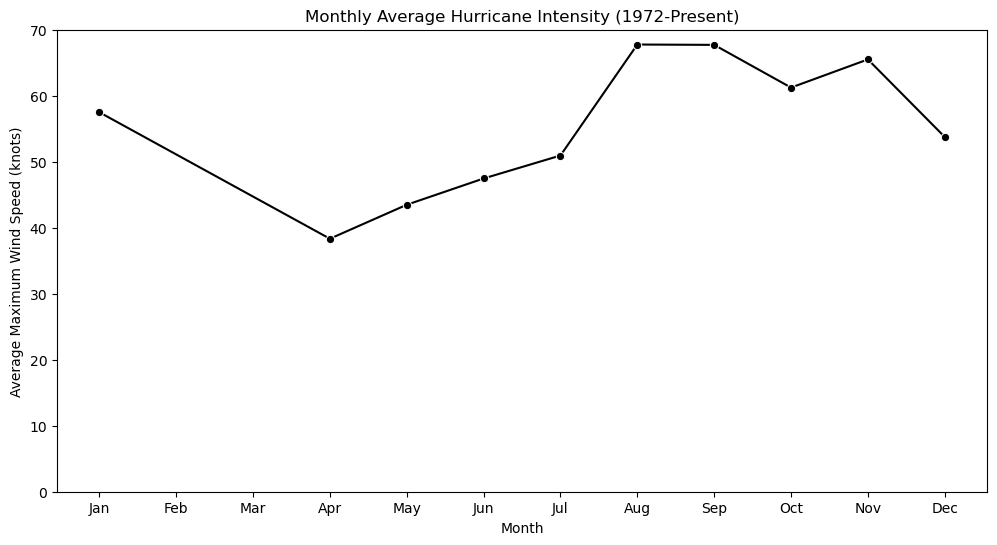

In [69]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='AvgIntensity', data=monthly_avg_intensity, marker='o', color='black')
plt.xlabel('Month')
plt.ylabel('Average Maximum Wind Speed (knots)')
plt.title('Monthly Average Hurricane Intensity (1972-Present)')
plt.ylim(0, 70)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);